#  Lab2: Splines
 
 
### First study the examples in different libraries: Scipy, Statsmodels, sk-learn, pyGAM, csaps, then try to use different different methods do the following questions: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

# 1. Regression Splines

The dataset fev.csv contains the measurements of forced expiratory volume (FEV) tests, evaluating the pulmonary capacity in 654 children and young adults.

1. ``Plot`` the association between fev and height and fit a ``linear model`` for fev using height as a predictor

2. Fit a model for fev with a ``natural cubin spline`` for the predictor height, with  df 5 and 10.

3. Fit a model for fev with a ``smoothing cubic spline`` for the predictor height. (Use cross valication to find smoothing parameter lambda) 

4. Fit a model for fev with a ``cubic B-spline`` for the predictor height, with  df 5 and 10.

5. Plot the ``fitted curves`` for above models. 

6. compare the ``cross-validated MSE`` of the above models.


In [2]:
df1 = pd.read_csv('fev.csv')
df1.head(3)

,id,age,fev,height,sex,smoke
0,301,9,1.708,57.0,female,non-current smoker
1,451,8,1.724,67.5,female,non-current smoker
2,501,7,1.720,54.5,female,non-current smoker


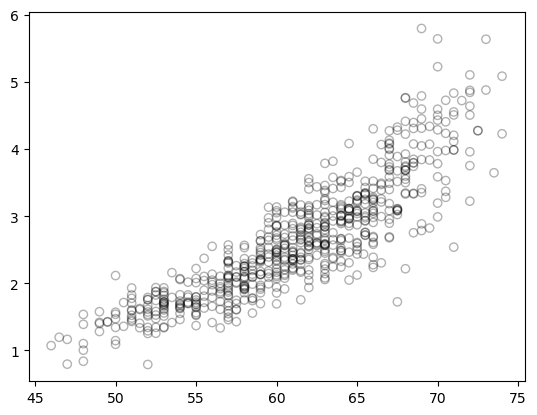

In [3]:
# Visualize the relationship b/w age and wage
plt.scatter(df1.height, df1.fev, facecolor='None', edgecolor='k', alpha=0.3)
plt.show() 

In [4]:
# Generating weights for polynomial function with degree =5
weights = np.polyfit(df1.height, df1.fev, 5)
print(weights) 

[-3.62882036e-07  1.04598980e-04 -1.19414498e-02  6.77612870e-01
 -1.90808036e+01  2.13747676e+02]


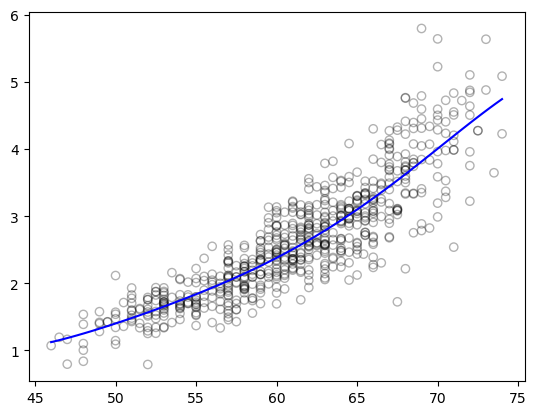

In [5]:
# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred = model(df1.height)
# We will plot the graph for 70 observations only
xp = np.linspace(df1.height.min(),df1.height.max(),70)
pred_plot = model(xp)
plt.scatter(df1.height,df1.fev, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot, color='blue')
plt.show()

# 1. Plotting the association between fev and height 

# 2. Classification 

You can use PyGAM:
https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html#Classification 

 


## Question:

The dataset Heart.csv contains on coronary heart disease status (variable chd) and several risk factors including the cumulative tobacco consumption tobacco, systolic sbp, and age

1. Fit a GAM logistic model for chd with splines for the predictor tobacco, sbp and age

2. Find the AUC ROC for the model above.  (optional)

3. Compare the AUC ROC of the GAM model with a logistic regression with linear effects for the predictors.(optional)


In [34]:
df2 = pd.read_csv('Heart.csv')
df2.head(3)

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0


In [35]:
display(df2.chd.value_counts())

0    302
1    160
Name: chd, dtype: int64

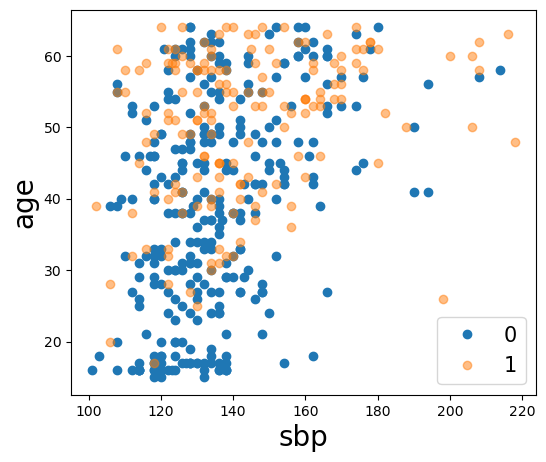

In [36]:
f, ax = plt.subplots(figsize=(6,5))

I_0 = df2["chd"]==0
I_1 = df2["chd"]==1

plt.plot(df2["sbp"][I_0], df2["age"][I_0],'o',label="0")

## We set alpha=.5 to try to avoid masking, but some points still will be burried. 
plt.plot(df2["sbp"][I_1], df2["age"][I_1],'o',label="1",alpha=.5)

plt.xlabel("sbp",fontsize=20)
plt.ylabel("age",fontsize=20)
plt.legend(fontsize=15)